# HDI stacked bar chart by theme

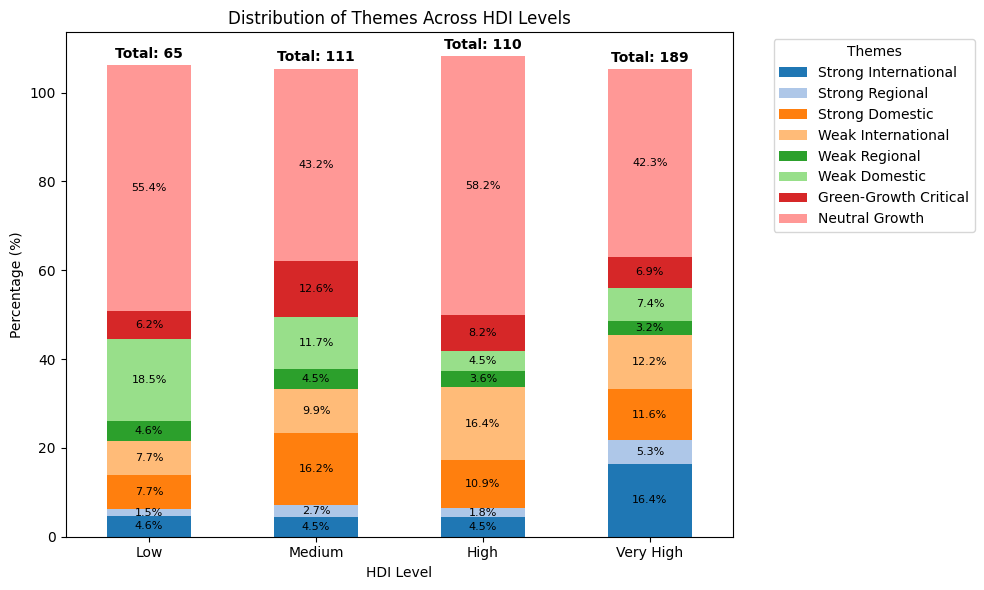

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV data into a pandas DataFrame
data = pd.read_csv('analysisdataset.csv')

# Define the order of HDI levels
hdi_levels = ['Low', 'Medium', 'High', 'Very High']

# Map of themes with their full descriptions
theme_descriptions = {
    'S_int': 'Strong International',
    'S_reg': 'Strong Regional',
    'S_dom': 'Strong Domestic',
    'W_int': 'Weak International',
    'W_reg': 'Weak Regional',
    'W_dom': 'Weak Domestic',
    'AG': 'Green-Growth Critical',
    'NG': 'Neutral Growth'
}

themes = list(theme_descriptions.keys())

# Initialize a dictionary to store the percentage of each theme in each HDI level
theme_distribution = {theme: [] for theme in themes}
total_speeches_per_level = []

# Calculate the percentage of each theme within each HDI level
for hdi_level in hdi_levels:
    hdi_data = data[data['HDI_Level'] == hdi_level]
    total_speeches = len(hdi_data)
    total_speeches_per_level.append(total_speeches)
    for theme in themes:
        count = hdi_data['Theme_Combined'].str.contains(theme).sum()
        percentage = (count / total_speeches) * 100 if total_speeches > 0 else 0
        theme_distribution[theme].append(percentage)

# Create a DataFrame for plotting
theme_distribution_df = pd.DataFrame(theme_distribution, index=hdi_levels)

# Plot the stacked bar chart
ax = theme_distribution_df.plot(kind='bar', stacked=True, figsize=(10, 6), color=plt.cm.tab20.colors)

# Add percentages on the bars
for bar in ax.patches:
    # Get the height of the bar
    height = bar.get_height()
    # Calculate the y position for the label
    if height > 0:
        ax.text(
            bar.get_x() + bar.get_width() / 2, 
            bar.get_y() + height / 2, 
            f'{height:.1f}%', 
            ha='center', 
            va='center',
            fontsize=8,
            color='black'
        )

# Add total count of speeches at the top of each bar
for idx, total in enumerate(total_speeches_per_level):
    ax.text(
        idx, 
        theme_distribution_df.iloc[idx].sum() + 1, 
        f'Total: {total}', 
        ha='center', 
        va='bottom',
        fontsize=10,
        fontweight='bold',
        color='black'
    )

# Customize the plot
handles, labels = ax.get_legend_handles_labels()
new_labels = [theme_descriptions[label] for label in labels]
ax.legend(handles, new_labels, title='Themes', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Distribution of Themes Across HDI Levels')
plt.xlabel('HDI Level')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()


# GDP Stacked bar chart by theme
information for classifications from the world bank - https://ourworldindata.org/grapher/world-bank-income-groups#:~:text=For%20the%20current%202024%20fiscal,those%20with%20a%20GNI%20per

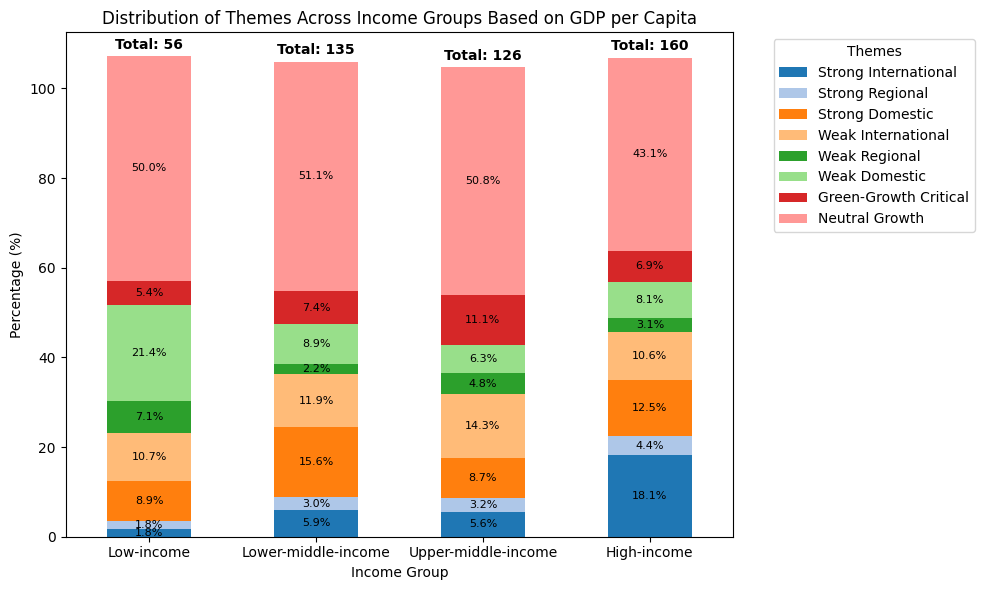

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV data into a pandas DataFrame
data = pd.read_csv('analysisdataset.csv')

# Define the GDP per capita thresholds and the income groups
income_groups = {
    'Low-income': (0, 1135),
    'Lower-middle-income': (1136, 4465),
    'Upper-middle-income': (4466, 13845),
    'High-income': (13846, float('inf'))
}

# Map of themes with their full descriptions
theme_descriptions = {
    'S_int': 'Strong International',
    'S_reg': 'Strong Regional',
    'S_dom': 'Strong Domestic',
    'W_int': 'Weak International',
    'W_reg': 'Weak Regional',
    'W_dom': 'Weak Domestic',
    'AG': 'Green-Growth Critical',
    'NG': 'Neutral Growth'
}

themes = list(theme_descriptions.keys())

# Function to classify GDP per capita into income groups
def classify_income(gdp_per_capita):
    for group, (lower, upper) in income_groups.items():
        if lower <= gdp_per_capita <= upper:
            return group
    return None

# Add a new column for income groups based on GDP per capita
data['Income_Group'] = data['GDP_capita'].apply(classify_income)

# Initialize a dictionary to store the percentage of each theme in each income group
theme_distribution = {theme: [] for theme in themes}
total_speeches_per_group = []

# Calculate the percentage of each theme within each income group
for group in income_groups.keys():
    group_data = data[data['Income_Group'] == group]
    total_speeches = len(group_data)
    total_speeches_per_group.append(total_speeches)
    for theme in themes:
        count = group_data['Theme_Combined'].str.contains(theme).sum()
        percentage = (count / total_speeches) * 100 if total_speeches > 0 else 0
        theme_distribution[theme].append(percentage)

# Create a DataFrame for plotting
theme_distribution_df = pd.DataFrame(theme_distribution, index=income_groups.keys())

# Plot the stacked bar chart
ax = theme_distribution_df.plot(kind='bar', stacked=True, figsize=(10, 6), color=plt.cm.tab20.colors)

# Add percentages on the bars
for bar in ax.patches:
    # Get the height of the bar
    height = bar.get_height()
    # Calculate the y position for the label
    if height > 0:
        ax.text(
            bar.get_x() + bar.get_width() / 2, 
            bar.get_y() + height / 2, 
            f'{height:.1f}%', 
            ha='center', 
            va='center',
            fontsize=8,
            color='black'
        )

# Add total count of speeches at the top of each bar
for idx, total in enumerate(total_speeches_per_group):
    ax.text(
        idx, 
        theme_distribution_df.iloc[idx].sum() + 1, 
        f'Total: {total}', 
        ha='center', 
        va='bottom',
        fontsize=10,
        fontweight='bold',
        color='black'
    )

# Customize the plot
handles, labels = ax.get_legend_handles_labels()
new_labels = [theme_descriptions[label] for label in labels]
ax.legend(handles, new_labels, title='Themes', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Distribution of Themes Across Income Groups Based on GDP per Capita')
plt.xlabel('Income Group')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()


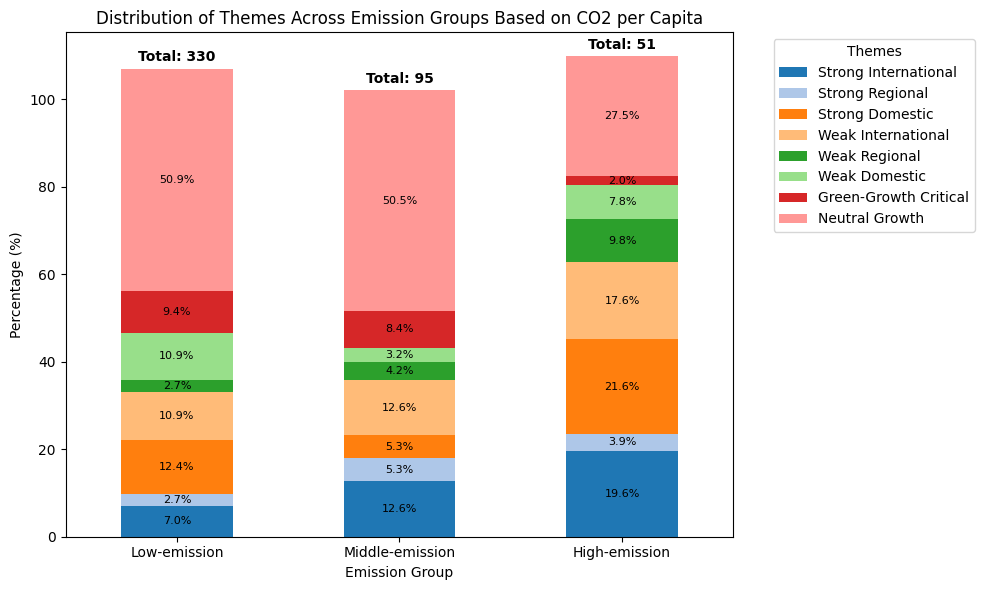

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV data into a pandas DataFrame
data = pd.read_csv('analysisdataset.csv')

# Define the CO2 emissions per capita thresholds and the emission groups
emission_groups = {
    'Low-emission': (0, 5),
    'Middle-emission': (5, 10),
    'High-emission': (10, float('inf'))
}

# Map of themes with their full descriptions
theme_descriptions = {
    'S_int': 'Strong International',
    'S_reg': 'Strong Regional',
    'S_dom': 'Strong Domestic',
    'W_int': 'Weak International',
    'W_reg': 'Weak Regional',
    'W_dom': 'Weak Domestic',
    'AG': 'Green-Growth Critical',
    'NG': 'Neutral Growth'
}

themes = list(theme_descriptions.keys())

# Function to classify CO2 emissions per capita into emission groups
def classify_emission(co2_per_capita):
    for group, (lower, upper) in emission_groups.items():
        if lower <= co2_per_capita <= upper:
            return group
    return None

# Add a new column for emission groups based on CO2 per capita
data['Emission_Group'] = data['Annual_Capita_CO2_Consumption'].apply(classify_emission)

# Initialize a dictionary to store the percentage of each theme in each emission group
theme_distribution = {theme: [] for theme in themes}
total_speeches_per_group = []

# Calculate the percentage of each theme within each emission group
for group in emission_groups.keys():
    group_data = data[data['Emission_Group'] == group]
    total_speeches = len(group_data)
    total_speeches_per_group.append(total_speeches)
    for theme in themes:
        count = group_data['Theme_Combined'].str.contains(theme).sum()
        percentage = (count / total_speeches) * 100 if total_speeches > 0 else 0
        theme_distribution[theme].append(percentage)

# Create a DataFrame for plotting
theme_distribution_df = pd.DataFrame(theme_distribution, index=emission_groups.keys())

# Plot the stacked bar chart
ax = theme_distribution_df.plot(kind='bar', stacked=True, figsize=(10, 6), color=plt.cm.tab20.colors)

# Add percentages on the bars
for bar in ax.patches:
    # Get the height of the bar
    height = bar.get_height()
    # Calculate the y position for the label
    if height > 0:
        ax.text(
            bar.get_x() + bar.get_width() / 2, 
            bar.get_y() + height / 2, 
            f'{height:.1f}%', 
            ha='center', 
            va='center',
            fontsize=8,
            color='black'
        )

# Add total count of speeches at the top of each bar
for idx, total in enumerate(total_speeches_per_group):
    ax.text(
        idx, 
        theme_distribution_df.iloc[idx].sum() + 1, 
        f'Total: {total}', 
        ha='center', 
        va='bottom',
        fontsize=10,
        fontweight='bold',
        color='black'
    )

# Customize the plot
handles, labels = ax.get_legend_handles_labels()
new_labels = [theme_descriptions[label] for label in labels]
ax.legend(handles, new_labels, title='Themes', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Distribution of Themes Across Emission Groups Based on CO2 per Capita')
plt.xlabel('Emission Group')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()


# all on one graph

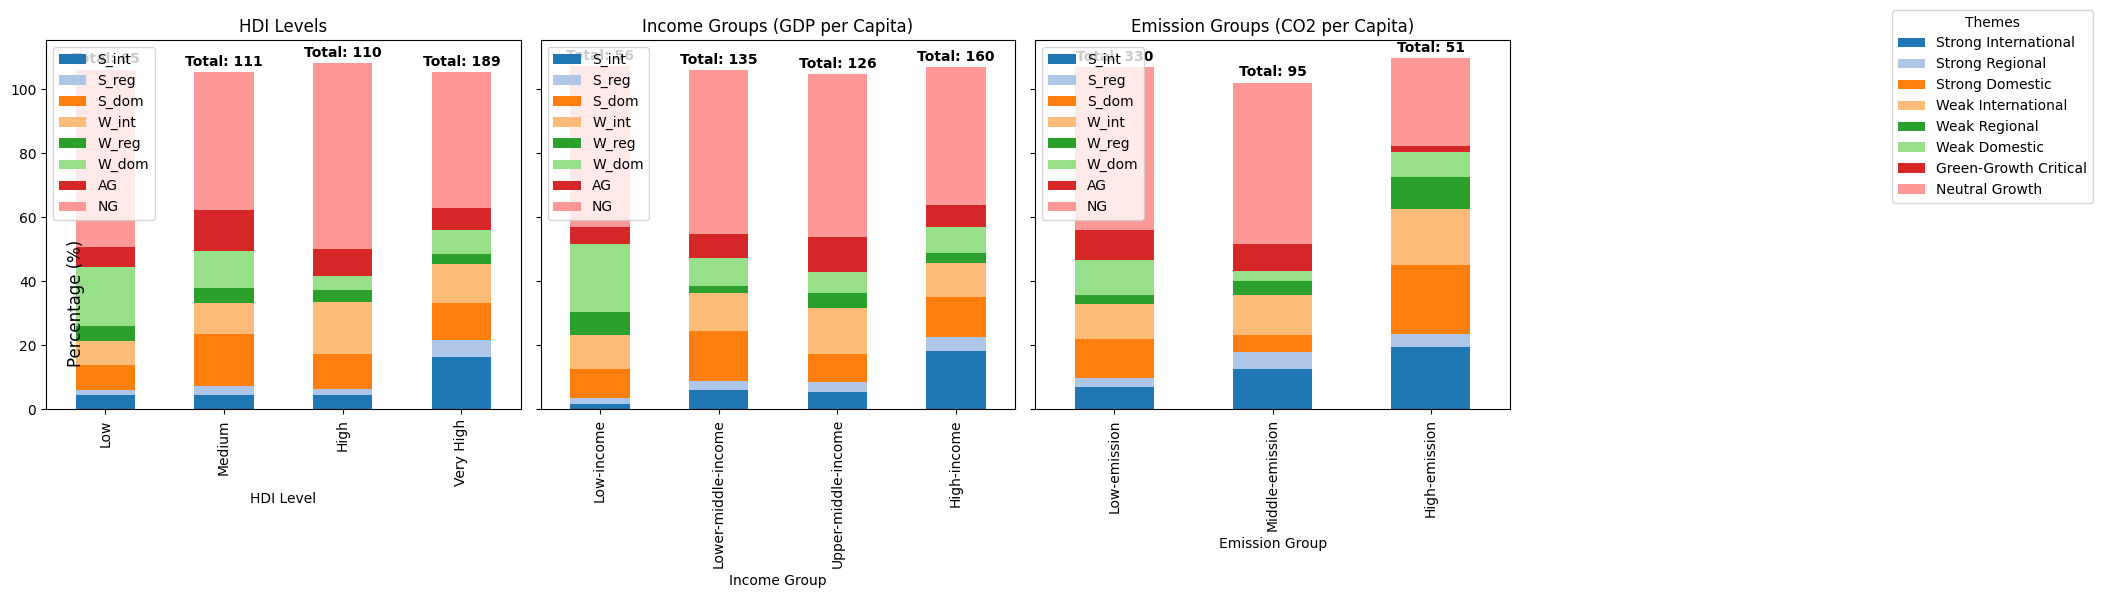

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV data into a pandas DataFrame
data = pd.read_csv('analysisdataset.csv')

# Define the order of HDI levels
hdi_levels = ['Low', 'Medium', 'High', 'Very High']

# Define the GDP per capita thresholds and the income groups
income_groups = {
    'Low-income': (0, 1135),
    'Lower-middle-income': (1136, 4465),
    'Upper-middle-income': (4466, 13845),
    'High-income': (13846, float('inf'))
}

# Define the CO2 emissions per capita thresholds and the emission groups
emission_groups = {
    'Low-emission': (0, 5),
    'Middle-emission': (5, 10),
    'High-emission': (10, float('inf'))
}

# Map of themes with their full descriptions
theme_descriptions = {
    'S_int': 'Strong International',
    'S_reg': 'Strong Regional',
    'S_dom': 'Strong Domestic',
    'W_int': 'Weak International',
    'W_reg': 'Weak Regional',
    'W_dom': 'Weak Domestic',
    'AG': 'Green-Growth Critical',
    'NG': 'Neutral Growth'
}

themes = list(theme_descriptions.keys())

# Function to classify GDP per capita into income groups
def classify_income(gdp_per_capita):
    for group, (lower, upper) in income_groups.items():
        if lower <= gdp_per_capita <= upper:
            return group
    return None

# Function to classify CO2 emissions per capita into emission groups
def classify_emission(co2_per_capita):
    for group, (lower, upper) in emission_groups.items():
        if lower <= co2_per_capita <= upper:
            return group
    return None

# Add new columns for income groups and emission groups
data['Income_Group'] = data['GDP_capita'].apply(classify_income)
data['Emission_Group'] = data['Annual_Capita_CO2_Consumption'].apply(classify_emission)

# Function to calculate theme distribution
def calculate_theme_distribution(group_column, groups):
    theme_distribution = {theme: [] for theme in themes}
    total_speeches_per_group = []

    for group in groups:
        group_data = data[data[group_column] == group]
        total_speeches = len(group_data)
        total_speeches_per_group.append(total_speeches)
        for theme in themes:
            count = group_data['Theme_Combined'].str.contains(theme).sum()
            percentage = (count / total_speeches) * 100 if total_speeches > 0 else 0
            theme_distribution[theme].append(percentage)

    return theme_distribution, total_speeches_per_group

# Calculate theme distributions for HDI, GDP per capita, and CO2 emissions per capita
theme_distribution_hdi, total_speeches_hdi = calculate_theme_distribution('HDI_Level', hdi_levels)
theme_distribution_gdp, total_speeches_gdp = calculate_theme_distribution('Income_Group', list(income_groups.keys()))
theme_distribution_co2, total_speeches_co2 = calculate_theme_distribution('Emission_Group', list(emission_groups.keys()))

# Create DataFrames for plotting
theme_distribution_hdi_df = pd.DataFrame(theme_distribution_hdi, index=hdi_levels)
theme_distribution_gdp_df = pd.DataFrame(theme_distribution_gdp, index=list(income_groups.keys()))
theme_distribution_co2_df = pd.DataFrame(theme_distribution_co2, index=list(emission_groups.keys()))

# Plot the combined bar charts
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Plot HDI
ax = theme_distribution_hdi_df.plot(kind='bar', stacked=True, ax=axes[0], color=plt.cm.tab20.colors)
axes[0].set_title('HDI Levels')
axes[0].set_xlabel('HDI Level')
for idx, total in enumerate(total_speeches_hdi):
    axes[0].text(idx, theme_distribution_hdi_df.iloc[idx].sum() + 1, f'Total: {total}', ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

# Plot GDP per capita
ax = theme_distribution_gdp_df.plot(kind='bar', stacked=True, ax=axes[1], color=plt.cm.tab20.colors)
axes[1].set_title('Income Groups (GDP per Capita)')
axes[1].set_xlabel('Income Group')
for idx, total in enumerate(total_speeches_gdp):
    axes[1].text(idx, theme_distribution_gdp_df.iloc[idx].sum() + 1, f'Total: {total}', ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

# Plot CO2 emissions per capita
ax = theme_distribution_co2_df.plot(kind='bar', stacked=True, ax=axes[2], color=plt.cm.tab20.colors)
axes[2].set_title('Emission Groups (CO2 per Capita)')
axes[2].set_xlabel('Emission Group')
for idx, total in enumerate(total_speeches_co2):
    axes[2].text(idx, theme_distribution_co2_df.iloc[idx].sum() + 1, f'Total: {total}', ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

# Customize the legend
handles, labels = axes[0].get_legend_handles_labels()
new_labels = [theme_descriptions[label] for label in labels]
fig.legend(handles, new_labels, title='Themes', bbox_to_anchor=(1.05, 1), loc='upper left')

# Set shared ylabel
fig.text(0.04, 0.5, 'Percentage (%)', va='center', rotation='vertical', fontsize=12)

plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()


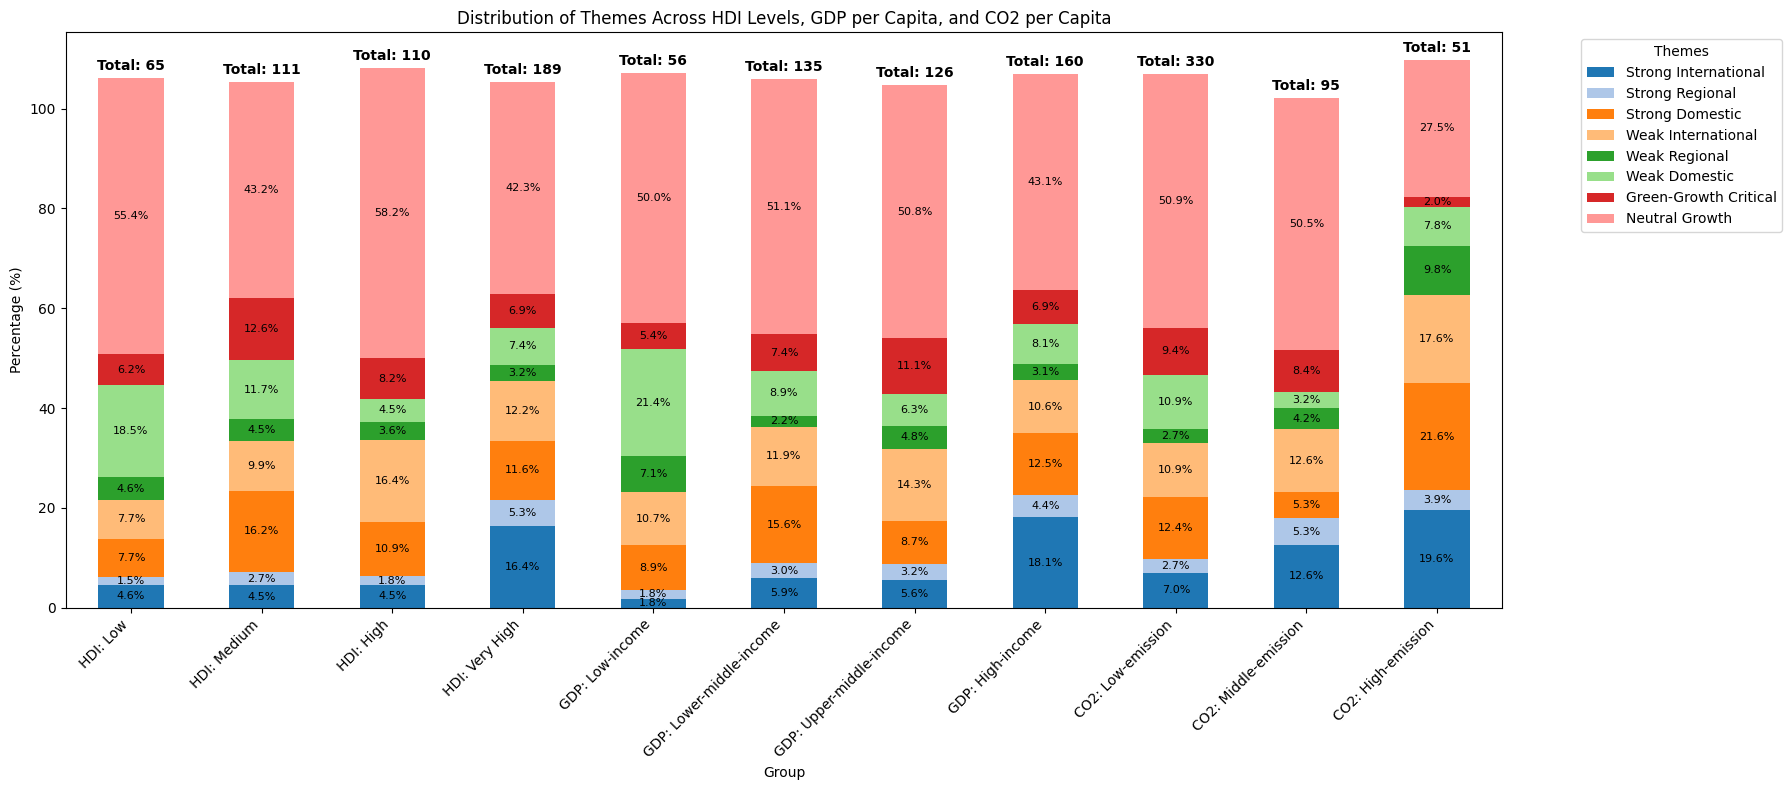

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV data into a pandas DataFrame
data = pd.read_csv('analysisdataset.csv')

# Define the order of HDI levels
hdi_levels = ['Low', 'Medium', 'High', 'Very High']

# Define the GDP per capita thresholds and the income groups
income_groups = {
    'Low-income': (0, 1135),
    'Lower-middle-income': (1136, 4465),
    'Upper-middle-income': (4466, 13845),
    'High-income': (13846, float('inf'))
}

# Define the CO2 emissions per capita thresholds and the emission groups
emission_groups = {
    'Low-emission': (0, 5),
    'Middle-emission': (5, 10),
    'High-emission': (10, float('inf'))
}

# Map of themes with their full descriptions
theme_descriptions = {
    'S_int': 'Strong International',
    'S_reg': 'Strong Regional',
    'S_dom': 'Strong Domestic',
    'W_int': 'Weak International',
    'W_reg': 'Weak Regional',
    'W_dom': 'Weak Domestic',
    'AG': 'Green-Growth Critical',
    'NG': 'Neutral Growth'
}

themes = list(theme_descriptions.keys())

# Function to classify GDP per capita into income groups
def classify_income(gdp_per_capita):
    for group, (lower, upper) in income_groups.items():
        if lower <= gdp_per_capita <= upper:
            return group
    return None

# Function to classify CO2 emissions per capita into emission groups
def classify_emission(co2_per_capita):
    for group, (lower, upper) in emission_groups.items():
        if lower <= co2_per_capita <= upper:
            return group
    return None

# Add new columns for income groups and emission groups
data['Income_Group'] = data['GDP_capita'].apply(classify_income)
data['Emission_Group'] = data['Annual_Capita_CO2_Consumption'].apply(classify_emission)

# Function to calculate theme distribution
def calculate_theme_distribution(group_column, groups):
    theme_distribution = {theme: [] for theme in themes}
    total_speeches_per_group = []

    for group in groups:
        group_data = data[data[group_column] == group]
        total_speeches = len(group_data)
        total_speeches_per_group.append(total_speeches)
        for theme in themes:
            count = group_data['Theme_Combined'].str.contains(theme).sum()
            percentage = (count / total_speeches) * 100 if total_speeches > 0 else 0
            theme_distribution[theme].append(percentage)

    return theme_distribution, total_speeches_per_group

# Calculate theme distributions for HDI, GDP per capita, and CO2 emissions per capita
theme_distribution_hdi, total_speeches_hdi = calculate_theme_distribution('HDI_Level', hdi_levels)
theme_distribution_gdp, total_speeches_gdp = calculate_theme_distribution('Income_Group', list(income_groups.keys()))
theme_distribution_co2, total_speeches_co2 = calculate_theme_distribution('Emission_Group', list(emission_groups.keys()))

# Create DataFrames for plotting
theme_distribution_hdi_df = pd.DataFrame(theme_distribution_hdi, index=hdi_levels)
theme_distribution_gdp_df = pd.DataFrame(theme_distribution_gdp, index=list(income_groups.keys()))
theme_distribution_co2_df = pd.DataFrame(theme_distribution_co2, index=list(emission_groups.keys()))

# Combine the DataFrames
combined_df = pd.concat([theme_distribution_hdi_df, theme_distribution_gdp_df, theme_distribution_co2_df])
combined_df.index = (["HDI: " + x for x in hdi_levels] + 
                     ["GDP: " + x for x in income_groups.keys()] + 
                     ["CO2: " + x for x in emission_groups.keys()])

# Plot the combined bar chart
ax = combined_df.plot(kind='bar', stacked=True, figsize=(18, 8), color=plt.cm.tab20.colors)

# Add percentages on the bars
for bar in ax.patches:
    # Get the height of the bar
    height = bar.get_height()
    # Calculate the y position for the label
    if height > 0:
        ax.text(
            bar.get_x() + bar.get_width() / 2, 
            bar.get_y() + height / 2, 
            f'{height:.1f}%', 
            ha='center', 
            va='center',
            fontsize=8,
            color='black'
        )

# Add total count of speeches at the top of each bar group
total_speeches = total_speeches_hdi + total_speeches_gdp + total_speeches_co2
for idx, total in enumerate(total_speeches):
    ax.text(
        idx, 
        combined_df.iloc[idx].sum() + 1, 
        f'Total: {total}', 
        ha='center', 
        va='bottom',
        fontsize=10,
        fontweight='bold',
        color='black'
    )

# Customize the legend
handles, labels = ax.get_legend_handles_labels()
new_labels = [theme_descriptions[label] for label in labels]
ax.legend(handles, new_labels, title='Themes', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Distribution of Themes Across HDI Levels, GDP per Capita, and CO2 per Capita')
plt.xlabel('Group')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()
